# Regression and Prediction

## Multiple Linear Regression

When there are multiple predictors, the equation is simply extended to accommodate them

Y= b0+b1X1+...+bnXn + e 

where e is the error

## The Lingo

### Root mean squared error
The square root of the average squared error of the regression.
### Residual standard error 
Root mean squared error but adjusted for degrees of freedom.
### R squared 
The proportion of variation explained by the model from 0 to 1.
### t-statistic
The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model.
### Weighted regression
Regression with the records having different weights.

In multiple linear regression we assess the relevancy of a feature by finding its F-statistic (instead of the p-value in linear model). The F-statistic is calculated for the overall model, whereas the p-value is specific to each predictor. If there is a strong relationship, then F will be much larger than 1. Otherwise, it will be approximately equal to 1.

In [4]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv("clean_sleepdata.csv") 
df=df.drop(['Unnamed: 0'], axis=1)

# Preview the first 5 lines of the loaded data 
df.head()

,Sleep quality,Sleep Notes,Heart rate,Activity (steps),Time in bed in minutes,Day,Month,Year,Bedtime,Woke up,Mood (out of 3)
0,63.0,Away from home:Drinking alcohol,81,10663,498.0,3,12,2017,00:44,09:02,2
1,72.0,Incense,67,16018,399.0,3,12,2017,23:17,05:56,2
2,84.0,Stressful day:🙂,81,6064,490.0,4,12,2017,22:38,06:49,2
3,83.0,Aerial:🙁,89,4378,496.0,5,12,2017,22:34,06:50,2
4,74.0,Incense,81,3105,450.0,6,12,2017,23:31,07:01,2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
Sleep quality             323 non-null float64
Sleep Notes               225 non-null object
Heart rate                323 non-null int64
Activity (steps)          323 non-null int64
Time in bed in minutes    323 non-null float64
Day                       323 non-null int64
Month                     323 non-null int64
Year                      323 non-null int64
Bedtime                   323 non-null object
Woke up                   323 non-null object
Mood (out of 3)           323 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 27.8+ KB


In [10]:
df_test = df.drop(['Sleep Notes', 'Bedtime', 'Woke up'], axis=1)
Xs = df_test.drop(['Sleep quality'], axis=1)
y = df_test[['Sleep quality']]
reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep quality   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           4.30e-92
Time:                        19:39:41   Log-Likelihood:                -1131.5
No. Observations:                 323   AIC:                             2279.
Df Residuals:                     315   BIC:                             2309.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -7156

The R² isn't much higher than that of simple linear regression, with a value of 0.75. This is because the p-value for hours in bed is low! 

Also, the F-statistic is 138.2. This is much greater than 1, it demonstrates that there is a strong relationship between sleep quality and the variables we have considered. 

However, some of the p values are high and thus we can assume are not statistically significant. Removing these predictors would slightly reduce the R² value, but we might make better predictions.


Let's see the two variables with a low p value. 

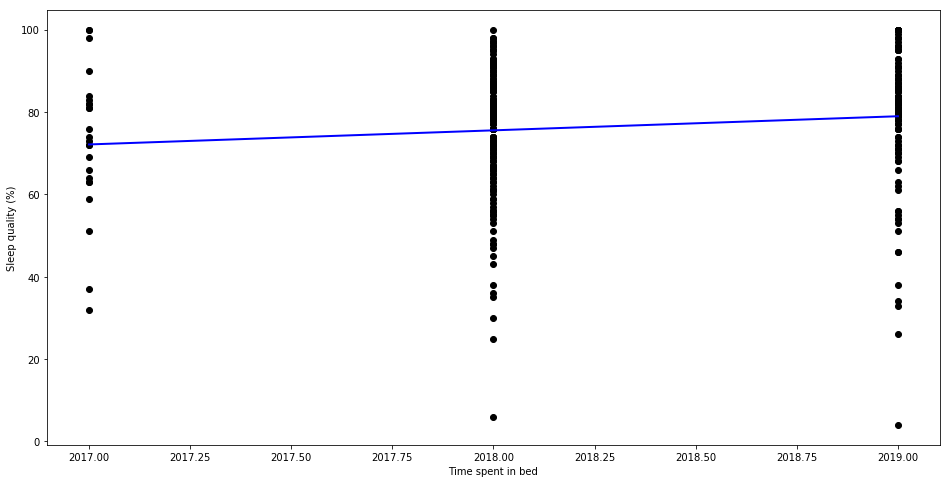

In [16]:
#I want to know if the year has had an effect on my sleep quality

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

#This creates a LinearRegression object
lm = LinearRegression()

X_Year= df[['Year']]
Y= df[['Sleep quality']]

lm.fit(X_Year, Y)

predictions = lm.predict(X_Year)


plt.figure(figsize=(16, 8))
plt.scatter(
    X_Year,
    Y,
    c='black'
)

plt.plot(
    X_Year,
    predictions,
    c='blue',
    linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Sleep quality (%)")
plt.show()

Interestingly, my sleep has been increasing in quality in the last few years.

In [20]:
Xs = df_test[['Time in bed in minutes','Year']]
y = df_test[['Sleep quality']]
reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep quality   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     477.6
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           8.54e-97
Time:                        20:00:06   Log-Likelihood:                -1135.0
No. Observations:                 323   AIC:                             2276.
Df Residuals:                     320   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5472

Here the F-statistic has shot up to 477.6 suggesting that it is a much better fit of the data.